<a href="https://colab.research.google.com/github/bhattacharya5/Computer_Vision/blob/main/TA_Hours/2_Spatial_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
    plt.title(title_2)
    plt.show()

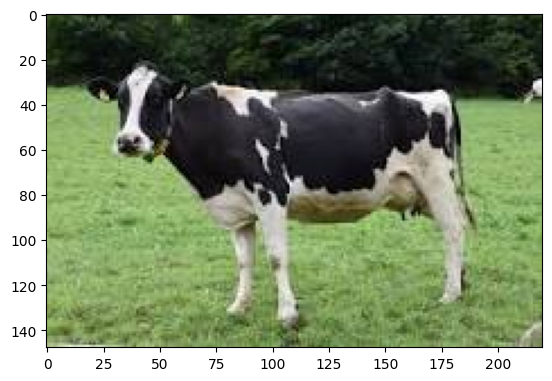

In [ ]:
# read in an image and display it
img = cv2.imread("/Users/aiman/Downloads/cow.jpeg")
#img = cv2.imread("/Users/aiman/Downloads/rgb.jpeg")

rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [ ]:
img.shape

(148, 220, 3)

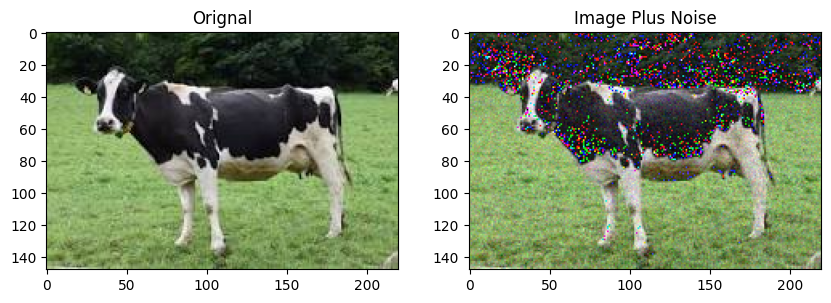

In [ ]:
# Get the number of rows and columns in the image
rows, cols,_= img.shape
# Creates values using a normal distribution with a mean of 0 and standard deviation of 15, the values are converted to unit8 which means the values are between 0 and 255
noise = np.random.normal(0,15,(rows,cols,3)).astype(np.uint8)
# Add the noise to the image
noisy_image = img + noise
# Plots the original image and the image with noise using the function defined at the top
plot_image(img, noisy_image, title_1="Orignal",title_2="Image Plus Noise")

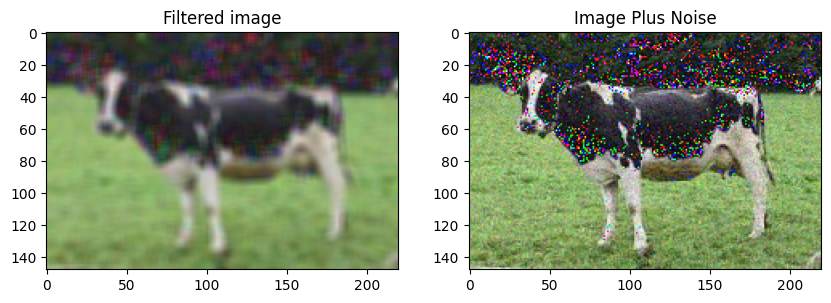

In [ ]:
kernel = np.ones((6,6))/36
image_filtered = cv2.filter2D(src=noisy_image, ddepth=-1, kernel=kernel)
# Plots the Filtered and Image with Noise using the function defined at the top
plot_image(image_filtered, noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

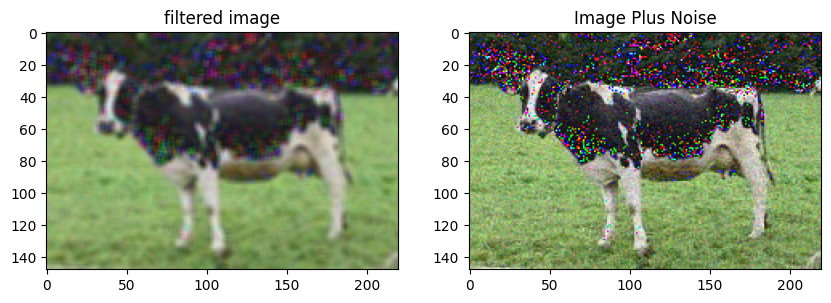

In [ ]:
# Creates a kernel which is a 4 by 4 array where each value is 1/16
kernel = np.ones((4,4))/16
# Filters the images using the kernel
image_filtered=cv2.filter2D(src=noisy_image,ddepth=-1,kernel=kernel)
# Plots the Filtered and Image with Noise using the function defined at the top
plot_image(image_filtered , noisy_image,title_1="filtered image",title_2="Image Plus Noise")

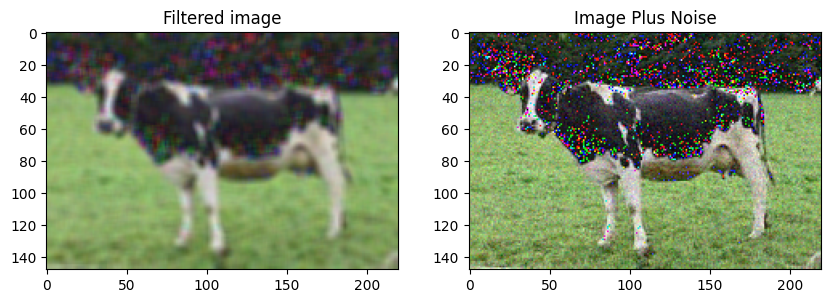

In [ ]:
# Filters the images using GaussianBlur on the image with noise using a 5 by 5 kernel
image_filtered = cv2.GaussianBlur(noisy_image,(5,5),sigmaX=4,sigmaY=4)
# Plots the Filtered Image then the Unfiltered Image with Noise
plot_image(image_filtered , noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

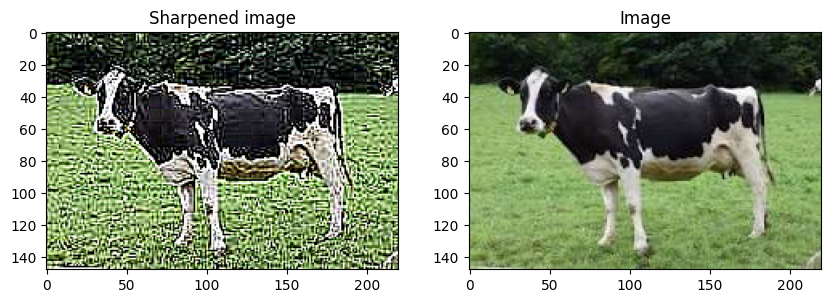

In [ ]:
# Common Kernel for image sharpening
kernel = np.array([[-1,-1,-1],
                   [-1, 9,-1],
                   [-1,-1,-1]])
# Applys the sharpening filter using kernel on the original image without noise
sharpened = cv2.filter2D(img, -1, kernel)
# Plots the sharpened image and the original image without noise
plot_image(sharpened , img, title_1="Sharpened image",title_2="Image")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


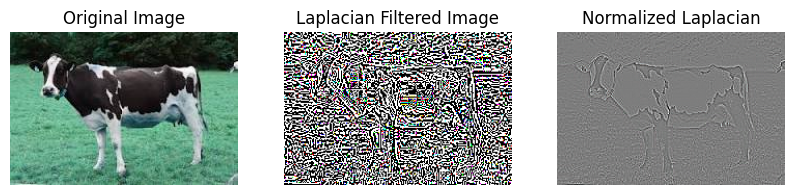

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read the image
image=img

# Check if the image was successfully loaded
if image is not None:
    # Apply Laplacian filtering
    laplacian = cv2.Laplacian(image, cv2.CV_64F)

    # Normalize the Laplacian result to be in the range [0, 255]
    laplacian_normalized = cv2.normalize(laplacian, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    # Display the original and sharpened images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(laplacian, cmap='gray')
    plt.title('Laplacian Filtered Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(laplacian_normalized, cmap='gray')
    plt.title('Normalized Laplacian')
    plt.axis('off')

    plt.show()
else:
    print("Error: Unable to read the image.")


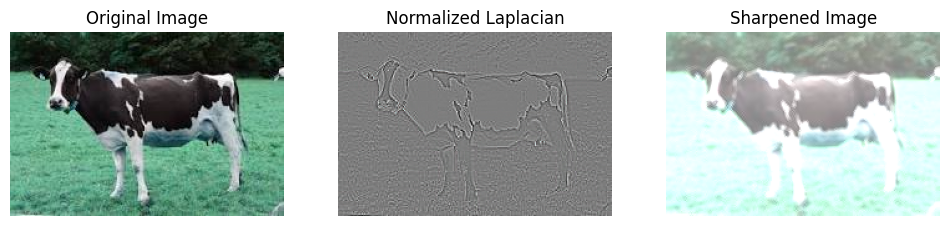

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read the image

image = img

# Check if the image was successfully loaded
if image is not None:
    # Apply Laplacian filtering
    laplacian = cv2.Laplacian(image, cv2.CV_64F)

    # Normalize the Laplacian result to be in the range [0, 255]
    laplacian_normalized = cv2.normalize(laplacian, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    # Add the normalized Laplacian to the original image
    sharpened_image = cv2.addWeighted(image, 1, laplacian_normalized, 1, 0)

    # Display the original, normalized Laplacian, and sharpened images
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(laplacian_normalized, cmap='gray')
    plt.title('Normalized Laplacian')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(sharpened_image, cmap='gray')
    plt.title('Sharpened Image')
    plt.axis('off')

    plt.show()
else:
    print("Error: Unable to read the image.")


In [ ]:
import cv2

# Load the image
image = img
# Blur the image
gauss = cv2.GaussianBlur(image, (7,7), 0)
# Apply Unsharp masking
unsharp_image = cv2.addWeighted(image, 2, gauss, -1, 0)

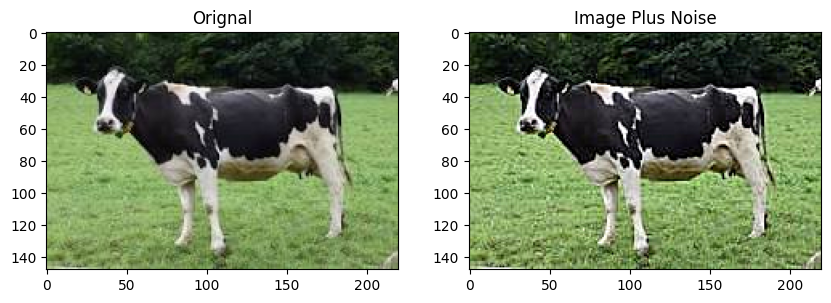

In [ ]:
plot_image(image, unsharp_image, title_1="Orignal",title_2="Image Sharpended")

In [ ]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(unsharp_image, cv2.COLOR_BGR2RGB))
plt.title("Cropped Image")
plt.axis("off")
plt.show()